Estimate the area of a circle of radius r=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_area(r=1,M = 1e4):

    rand_num = np.random.random((int(M),2))*r
    
    X,Y = rand_num[:,0],rand_num[:,1]
    
    is_in = (X**2 + Y**2) < r**2
    
    A = ((2.*r)**2)*len(X[is_in])/M

    return A

In [3]:
areas_mean,areas_std = [],[]
m_values = np.linspace(10000,1e5)

for m in m_values:
    trials = 1000
    area_mean = np.empty(trials,dtype=float)   
    
    for i in range(trials):
        area_mean[i] = calc_area(M = m)
        
    areas_mean.append(area_mean.mean())
    areas_std.append(area_mean.std())

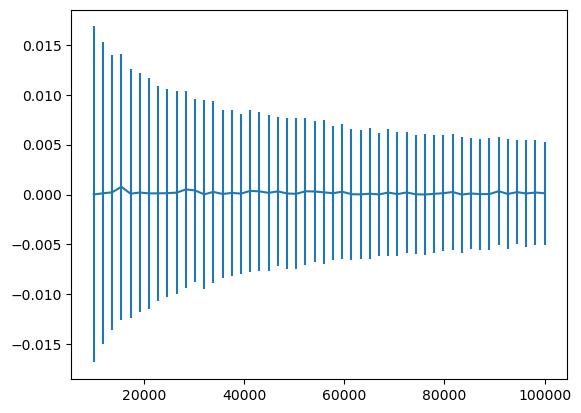

In [4]:
plt.errorbar(m_values,abs(np.array(areas_mean)-np.pi),yerr=areas_std);

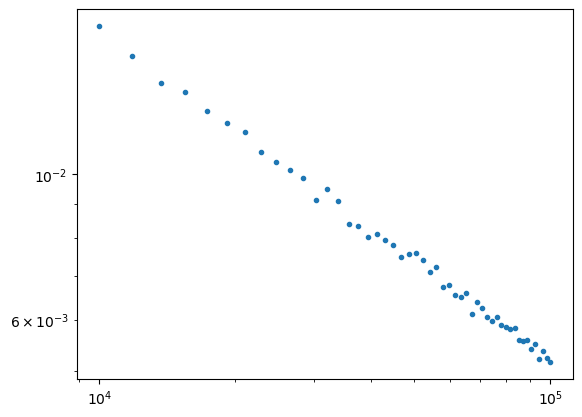

In [5]:
plt.loglog(m_values,areas_std,'.');

In [6]:
from scipy.optimize import curve_fit
fit_func = lambda n,alpha: n**(alpha)
popt, pcov = curve_fit(fit_func, m_values, areas_std)
popt

array([-0.45195911])